Importação das Bibliotecas necessárias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Preparação dos Dados

In [ ]:
# Função que irá preparar o conjunto de dados para que possa ser encaixado no modelo de Regressão Linear
def prepare_data(df, forecas_col, forecast_out, test_size):
  # cria uma nova coluna chamada label com as ultimas 5 linhas estando vazias
  label = df[forecast_col].shift(-forecast_out)
  X = np.array(df[[forecast_col]])
  X = preprocessing.scale(X)
  # cria a coluna que posteriormente será usada no método de previsão
  X_lately = X[-forecast_out:]
  # variavel que vai conter o treinamento e o teste
  X = X[:-forecast_out]
  # elimina valores vazios(nan ou na)
  label.dropna(inplace=True)
  # atribuição do valor de y
  y = np.array(label)
  # validação cruzada
  X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=0)

  response = [X_train, X_test, Y_train, Y_test, X_lately]
  return response

Leitura dos dados

In [ ]:
df = pd.read_csv("/content/GOOG.csv")

Preparação de variáveis de entrada

In [ ]:
# coluna que se quer prever
forecast_col = 'Close'
# número de períodos à frente para prever
forecast_out = 5
# proporção do conjunto em relação ao conjunto total (neste caso 20%)
test_size = 0.2

Divisão dos dados e encaixa no modelo de regressão linear

In [ ]:
X_train, X_test, Y_train, Y_test, X_lately = prepare_data (df, forecast_col, forecast_out, test_size)
# inicializando modelo
learner = LinearRegression()
# treinando o modelo
learner.fit(X_train, Y_train)

LinearRegression()

Prevendo o resultado e printando os preços das ações

In [ ]:
score = learner.score(X_test, Y_test)
forecast = learner.predict(X_lately)
# cria um arquivo json
response = {}
response['Pontuação de desempenho do modelo'] = score
response['Previsão de Preços futuros'] = forecast

print(response)

{'Pontuação de desempenho do modelo': 0.9030602961734422, 'Previsão de Preços futuros': array([146.35787397, 149.13924011, 147.75782363, 145.56981467,
       146.28370236])}


In [ ]:
# Criando um DataFrame com os resultados da previsão
result_df = pd.DataFrame({'Valores Normalizados de X': X_lately.flatten(),
                          'Previsão de Preços futuro': forecast,
                          'Data': (pd.date_range(end=pd.Timestamp('now'), periods=len(X_lately))).date})


result_df.head(5)

,Valores Normalizados de X,Previsão de Preços futuro,Data
0,1.373844,146.357874,2024-02-10
1,1.563645,149.139240,2024-02-11
2,1.469377,147.757824,2024-02-12
3,1.320067,145.569815,2024-02-13
4,1.368783,146.283702,2024-02-14


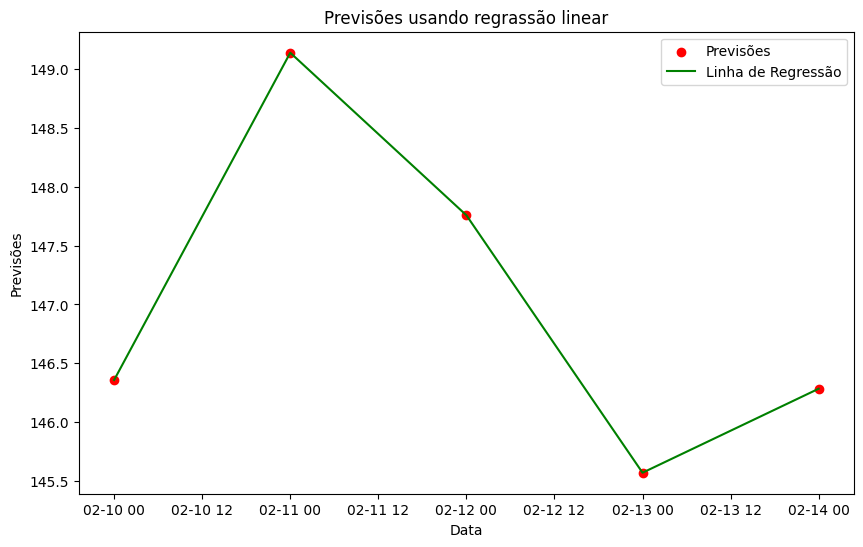

In [ ]:
plt.figure(figsize=(10,6)) # indica o tamanho da figura
plt.scatter(result_df['Data'], result_df['Previsão de Preços futuro'], color='red', label='Previsões') #plot dos dados reais
plt.plot(result_df['Data'], result_df['Previsão de Preços futuro'], color='green', label='Linha de Regressão')
plt.xlabel('Data')
plt.ylabel('Previsões')
plt.title('Previsões usando regrassão linear')
plt.legend()
plt.show() #exibe o grafico